## Preparation data

In [23]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Data_Tanaman_Padi_Sumatera_version_1.csv')
df.head()

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.0,323589.0,1627.0,82.00,26.06
1,Aceh,1994,1299699.0,329041.0,1521.0,82.12,26.92
2,Aceh,1995,1382905.0,339253.0,1476.0,82.72,26.27
3,Aceh,1996,1419128.0,348223.0,1557.0,83.00,26.08
4,Aceh,1997,1368074.0,337561.0,1339.0,82.46,26.31


In [ ]:
#Luas panen merupakan perhitungan secara objektif lahan padi yang dipanen

## Data Cleansing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provinsi        224 non-null    object 
 1   Tahun           224 non-null    int64  
 2   Produksi        224 non-null    float64
 3   Luas Panen      224 non-null    float64
 4   Curah hujan     224 non-null    float64
 5   Kelembapan      224 non-null    float64
 6   Suhu rata-rata  224 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 12.4+ KB


<p> melihat jumlah missing value </p>

In [4]:
df.isnull().sum()

Provinsi          0
Tahun             0
Produksi          0
Luas Panen        0
Curah hujan       0
Kelembapan        0
Suhu rata-rata    0
dtype: int64

In [3]:
new_names={
    'Luas Panen':'Luas_Panen',
    'Curah hujan':'Curah_Hujan',
    'Suhu rata-rata':'Suhu_Rata2',
}

In [4]:
df.rename(columns=new_names, inplace=True)

In [5]:
df.describe()

,Tahun,Produksi,Luas_Panen,Curah_Hujan,Kelembapan,Suhu_Rata2
count,224.000000,2.240000e+02,224.000000,224.000000,224.000000,224.000000
mean,2006.500000,1.679701e+06,374349.966920,2452.490759,80.948705,26.801964
std,8.095838,1.161387e+06,232751.161987,1031.972625,4.878680,1.197041
min,1993.000000,4.293800e+04,63142.040000,222.500000,54.200000,22.190000
25%,1999.750000,5.488570e+05,146919.500000,1703.525000,78.975000,26.177500
50%,2006.500000,1.667773e+06,373551.500000,2315.700000,82.375000,26.730000
75%,2013.250000,2.436851e+06,514570.250000,3039.700000,84.000000,27.200000
max,2020.000000,4.881089e+06,872737.000000,5522.000000,90.600000,29.850000


In [8]:
df.head()

,Provinsi,Tahun,Produksi,Luas_Panen,Curah_Hujan,Kelembapan,Suhu_Rata2
0,Aceh,1993,1329536.0,323589.0,1627.0,82.00,26.06
1,Aceh,1994,1299699.0,329041.0,1521.0,82.12,26.92
2,Aceh,1995,1382905.0,339253.0,1476.0,82.72,26.27
3,Aceh,1996,1419128.0,348223.0,1557.0,83.00,26.08
4,Aceh,1997,1368074.0,337561.0,1339.0,82.46,26.31


<p> Melihat outlier </p>

In [10]:
import matplotlib.pyplot as plt
import sklearn

In [10]:
df.describe()

,Tahun,Produksi,Luas_Panen,Curah_Hujan,Kelembapan,Suhu_Rata2
count,224.000000,2.240000e+02,224.000000,224.000000,224.000000,224.000000
mean,2006.500000,1.679701e+06,374349.966920,2452.490759,80.948705,26.801964
std,8.095838,1.161387e+06,232751.161987,1031.972625,4.878680,1.197041
min,1993.000000,4.293800e+04,63142.040000,222.500000,54.200000,22.190000
25%,1999.750000,5.488570e+05,146919.500000,1703.525000,78.975000,26.177500
50%,2006.500000,1.667773e+06,373551.500000,2315.700000,82.375000,26.730000
75%,2013.250000,2.436851e+06,514570.250000,3039.700000,84.000000,27.200000
max,2020.000000,4.881089e+06,872737.000000,5522.000000,90.600000,29.850000


In [ ]:
#dapat dilihat di nilai min dan max, luas panen diduga memiliki nilai outlier

array([[<AxesSubplot:title={'center':'Aceh'}>,
        <AxesSubplot:title={'center':'Bengkulu'}>,
        <AxesSubplot:title={'center':'Jambi'}>],
       [<AxesSubplot:title={'center':'Lampung'}>,
        <AxesSubplot:title={'center':'Riau'}>,
        <AxesSubplot:title={'center':'Sumatera Barat'}>],
       [<AxesSubplot:title={'center':'Sumatera Selatan'}>,
        <AxesSubplot:title={'center':'Sumatera Utara'}>, <AxesSubplot:>]],
      dtype=object)

<Figure size 432x288 with 0 Axes>

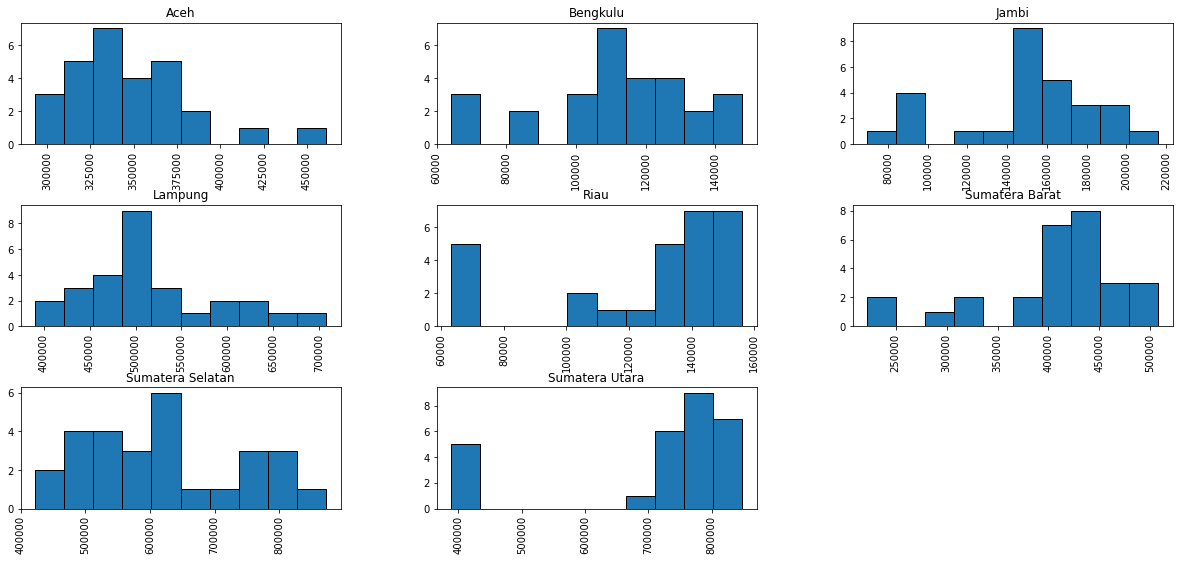

In [64]:
plt.figure()
df['Luas_Panen'].hist(by=df['Provinsi'], figsize=(20,9), edgecolor='black')

<AxesSubplot:title={'center':'Luas_Panen'}, xlabel='Provinsi'>

<Figure size 720x432 with 0 Axes>

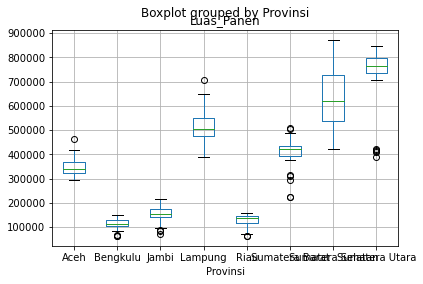

In [65]:
plt.figure(figsize=(10,6))
df.boxplot(column=['Luas_Panen'], by='Provinsi')

In [ ]:
#setelah di uji menggunakan histogram dan boxplot, hasilnya variabel Luas Panen terdeteksi adanya nilai outlier
#nilai outlier pada variabel Luas Panen bisa terjadi karena luas Panen padi disetiap daerah tidak sama dan berbeda karena melihat keadaan geografis antar provinsi di pulau sumatera

In [ ]:
#memperbaiki nilai outlier

In [6]:
def impute_outliers_IQR(df):

    q1=df.quantile(0.25)
    q3=df.quantile(0.75)

    IQR=q3-q1

    upper = df[~(df>(q3+1.5*IQR))].max()
    lower = df[~(df<(q3+1.5*IQR))].min()
    
    df=np.where(df>upper,
        df.median(),
        np.where(
            df <lower,
            df.median(),
            df
        )
    )
    return df

In [7]:
#setelah di definisikan diatas, maka sekarang membuat kolom baru
df['Luas_Panen2'] = impute_outliers_IQR(df['Luas_Panen'])

In [8]:
df['Luas_Panen2'].describe()

count       224.000000
mean     374349.966920
std      232751.161987
min       63142.040000
25%      146919.500000
50%      373551.500000
75%      514570.250000
max      872737.000000
Name: Luas_Panen2, dtype: float64

<AxesSubplot:>

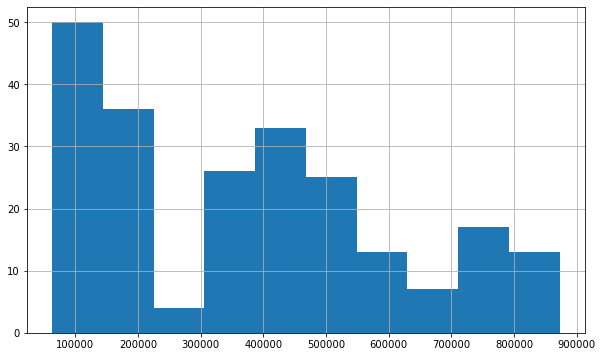

In [11]:
plt.figure(figsize=(10,6))
df['Luas_Panen2'].hist(bins=10)

<p> Uji Normalitas Data </p>

In [59]:
import scipy
from scipy.stats import kstest, shapiro

In [63]:
ksdata = kstest(df['Luas_Panen2'],'norm')
print(ksdata)
swdata = shapiro(df['Luas_Panen2'])
print(swdata)

KstestResult(statistic=1.0, pvalue=0.0)
ShapiroResult(statistic=0.9192113876342773, pvalue=1.0551849394246915e-09)


## Exploratory Data

In [29]:
#melihat korelasi antar variabel
df.corr()

,Tahun,Produksi,Luas_Panen,Curah_Hujan,Kelembapan,Suhu_Rata2,Luas_Panen2
Tahun,1.000000,0.182527,-0.045951,-0.047645,-0.033474,0.004923,-0.045951
Produksi,0.182527,1.000000,0.905622,-0.042129,-0.052316,0.041160,0.905622
Luas_Panen,-0.045951,0.905622,1.000000,-0.092975,-0.061121,0.115726,1.000000
Curah_Hujan,-0.047645,-0.042129,-0.092975,1.000000,0.056466,-0.228699,-0.092975
Kelembapan,-0.033474,-0.052316,-0.061121,0.056466,1.000000,-0.407799,-0.061121
Suhu_Rata2,0.004923,0.041160,0.115726,-0.228699,-0.407799,1.000000,0.115726
Luas_Panen2,-0.045951,0.905622,1.000000,-0.092975,-0.061121,0.115726,1.000000


In [ ]:
#kesimpulan dari korelasi diatas
#1. variabel produksi memiliki korelasi dengan luas panen
#2. variabel curah hujan memiliki korelasi dengan kelembapan

In [18]:
#melihat korelasi
import seaborn as sns

<AxesSubplot:xlabel='Produksi', ylabel='Luas_Panen2'>

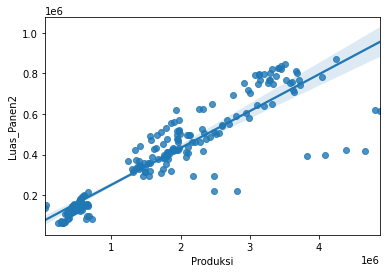

In [30]:
sns.regplot(x="Produksi", y="Luas_Panen2", data=df)

In [ ]:
#dapat dilihat dengan menggunakan metode regresi, variabel Luas Panen dan Produksi memiliki korelasi

<p>Provinsi mana yang memiliki produksi tertinggi</p>

In [52]:
print('Provinsi yang produksinya tertinggi:',df.groupby(['Provinsi'], sort=False)['Produksi'].max())

Provinsi yang produksinya tertinggi: Provinsi
Aceh                2478922.0
Sumatera Utara      4669777.5
Sumatera Barat      2810425.0
Riau                 574864.0
Jambi                678127.0
Sumatera Selatan    4881089.0
Bengkulu             714017.0
Lampung             4090654.0
Name: Produksi, dtype: float64


<p>Provinsi yang produksinya terendah</p>

In [49]:
print('Provinsi yang produksinya terendah:',df.groupby(['Provinsi'], sort=False)['Produksi'].min())

Provinsi yang produksinya terendah: Provinsi
Aceh                1246614.00
Sumatera Utara      2076280.01
Sumatera Barat      1450839.74
Riau                  42938.00
Jambi                 58663.00
Sumatera Selatan    1347611.00
Bengkulu             288810.52
Lampung             1615751.00
Name: Produksi, dtype: float64


<p>Provinsi dengan Luas Panen tertinggi</p>

In [54]:
print('Provinsi yang produksinya terendah:',df.groupby(['Provinsi'], sort=False)['Luas_Panen'].max())

Provinsi yang produksinya terendah: Provinsi
Aceh                461060.0
Sumatera Utara      847610.0
Sumatera Barat      507545.0
Riau                156088.0
Jambi               215975.0
Sumatera Selatan    872737.0
Bengkulu            147680.0
Lampung             707266.0
Name: Luas_Panen, dtype: float64


<p>Provinsi dengan Luas Panen terendah</p>

In [55]:
print('Provinsi yang produksinya terendah:',df.groupby(['Provinsi'], sort=False)['Luas_Panen'].min())

Provinsi yang produksinya terendah: Provinsi
Aceh                293067.00
Sumatera Utara      388591.22
Sumatera Barat      222021.00
Riau                 63142.04
Jambi                69536.06
Sumatera Selatan    422109.00
Bengkulu             64137.28
Lampung             390799.00
Name: Luas_Panen, dtype: float64
